# **Stegoanálisis**
## **Importación de dependencias**

In [43]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
try:
  import bitstring
except ModuleNotFoundError:
  !pip install bitstring
  import bitstring

## **Métodos para la extracción de mensajes**

### Extracción de valores por filas (x), columnas (y) y canales --> i, j, k

In [44]:
def extract_message(img):
  bits = ''
  rows, columns, channels = img.shape

  for i in range(rows):
    for j in range(columns):
      for k in range(channels):
        b_ch = bitstring.BitArray(uint = img[i,j,k], length = 8)
        value = 1 if b_ch[-1] == True else 0
        bits += str(value)
  
  bits_msg = bitstring.BitArray(bin = bits)
  rescued_msg = ''
  for byte in bits_msg.bytes:
      if byte > 31 and byte < 126:
        rescued_msg += chr(byte)



  return rescued_msg



### Extracción de valores por filas y columnas en un canal determinado 

In [45]:
def extract_message_from_channel(img,channel):
  bits = ''
  rows, columns, channels = img.shape

  for i in range(rows):
    for j in range(columns):
      b_ch = bitstring.BitArray(uint = img[i,j,channel], length = 8)
      value = 1 if b_ch[-1] == True else 0
      bits += str(value)
  
  bits_msg = bitstring.BitArray(bin = bits)
  rescued_msg = ''
  for byte in bits_msg.bytes:
      if byte > 31 and byte < 126:
        rescued_msg += chr(byte)

  return rescued_msg

### Extracción de valores en escala de grises

In [46]:
def extract_message_from_gray_scale(img):
  bits = ''
  rows, columns = img.shape

  for i in range(rows):
    for j in range(columns):
      b_ch = bitstring.BitArray(uint = img[i,j], length = 8)
      value = 1 if b_ch[-1] == True else 0
      bits += str(value)
  
  bits_msg = bitstring.BitArray(bin = bits)
  rescued_msg = ''
  for byte in bits_msg.bytes:
    rescued_msg += chr(byte)
  return rescued_msg 

### Extracción de valores por columnas

In [47]:
def extract_message_from_columns(img):
  bits = ''
  rows, columns, channels = img.shape

  for i in range(columns):
    for j in range(rows):
      for k in range(channels):
        b_ch = bitstring.BitArray(uint = img[j,i,k], length = 8)
        value = 1 if b_ch[-1] == True else 0
        bits += str(value)
  
  bits_msg = bitstring.BitArray(bin = bits)
  rescued_msg = ''
  for byte in bits_msg.bytes:
      rescued_msg += chr(byte)



  return rescued_msg

### Método para el análisis visual



In [48]:
# Establecemos valores para LSB=1 y LSB=0
from PIL import Image

def visual_attack(filename):
  height = Image.open( filename ).height
  width = Image.open( filename ).width

  print('Height: ' + str(height))
  print ('Width: ' + str(width) )

  img = cv2.imread(filename)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

  rows, columns, channels = img.shape

  for i in range(rows):
    for j in range(columns):
      for k in range(channels):
        if img[i,j,k] % 2 == 0: # LSB es 0
          img[i,j,k] = 255
        elif img[i,j,k] % 2 == 1: # LSB es 1
          img[i,j,k] = 0

  plt.imshow(img)
  plt.show()


Resultados de análisis visual 

Imagen 1:
Height: 512
Width: 512


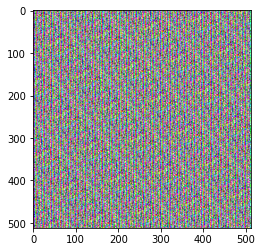

Imagen 2:
Height: 512
Width: 512


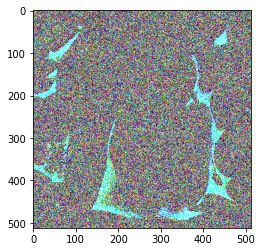

Imagen 3:
Height: 512
Width: 512


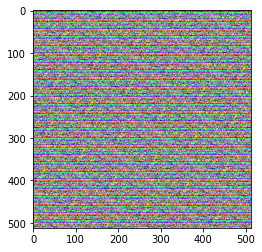

In [49]:
print('Imagen 1:')
visual_attack('imagen_1.tiff')

print('Imagen 2:')
visual_attack('imagen_2.tiff')

print('Imagen 3:')
visual_attack('imagen_3.tiff')

### Método de análisis visual visto en clase

In [6]:
def visual_attack_stego(filename):
  pixels = cv2.imread(filename)
  pixels = cv2.cvtColor(pixels, cv2.COLOR_RGB2BGR)
  height, width,_ = pixels.shape
  for y in range(height):
    for x in range(width):
      r=g=b=0
      if pixels[x,y][0] % 2 == 1:
        r = 0
      else:
        r = 255
      if pixels[x,y][1] % 2 == 1:
        g = 0
      else:
        g = 255
      if pixels[x,y][2] % 2 == 1:
        b = 0
      else:
        b = 255
      pixels[x,y] = (r,g,b)

  plt.imshow(pixels)
  plt.show()

Resultados del análisis visual visto en clase

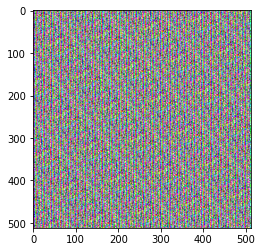

In [96]:
visual_attack_stego('imagen_1.tiff')
#visual_attack_stego('imagen_2.tiff')
#visual_attack_stego('imagen_3.tiff')


# **Solución imagen 1**

Message:
En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivia un hidalgo de los de lanza en astillero, adarga antigua, rocin flaco y galgo corredor. Una olla de algo mas vaca que carnero, salpicon las mas noches, duelos y quebrantos los sabados, lentejas los viernes, algun palomino de aadidura los domingos, consumian las tres partes de su hacienda. El resto della concluian sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los dias de entre semana se honraba con su vellori de lo mas fino. Tenia en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que asi ensillaba el rocin como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta aos, era de complexion recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenia el sobrenombre de Quijada o Quesada (que en esto hay alguna diferencia en los autor

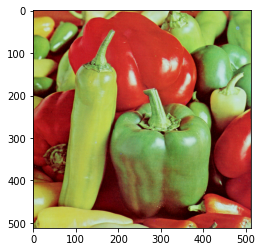

In [51]:
img = cv2.imread('imagen_1.tiff')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

rescued_msg = extract_message(img)
plt.imshow(img)
print('Message:')
print(rescued_msg)

In [ ]:
img = cv2.imread('imagen_2.tiff',0)
plt.imshow(img, cmap='gray')
print(img.shape)
plt.show()

rescued_msg = extract_message_from_gray_scale(img)

print('Message:')
print(rescued_msg)

In [42]:
def extract_message_from_columns(img):
  bits = ''
  rows, columns, channels = img.shape

  for i in range(columns):
    for j in range(rows):
      for k in range(channels):
        b_ch = bitstring.BitArray(uint = img[j,i,k], length = 8)
        value = 1 if b_ch[-1] == True else 0
        bits += str(value)
  
  bits_msg = bitstring.BitArray(bin = bits)
  rescued_msg = ''
  for byte in bits_msg.bytes:
      rescued_msg += chr(byte)

  return rescued_msg

Shape(512, 512, 3)
Message:
En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivia un hidalgo de los de lanza en astillero, adarga antigua, rocin flaco y galgo corredor. Una olla de algo mas vaca que carnero, salpicon las mas noches, duelos y quebrantos los sabados, lentejas los viernes, algun palomino de aÃ±adidura los domingos, consumian las tres partes de su hacienda. El resto della concluian sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los dias de entre semana se honraba con su vellori de lo mas fino. Tenia en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que asi ensillaba el rocin como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta aÃ±os, era de complexion recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenia el sobrenombre de Quijada o Quesada (que en esto hay alguna 

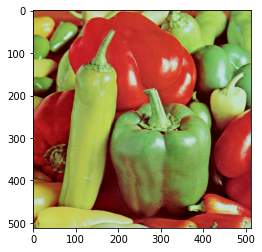

## **Solución en proceso imagen 2**

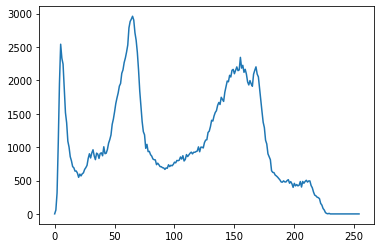

8238
[1, 58, 314, 1062, 1954, 2542, 2332, 2244, 1877, 1517, 1364, 1089, 1001, 857, 795, 709, 691, 641, 643, 611, 548, 596, 569, 601, 615, 666, 693, 727, 832, 901, 838, 914, 961, 869, 813, 911, 895, 831, 906, 915, 871, 1006, 902, 909, 964, 1059, 1113, 1183, 1341, 1421, 1530, 1652, 1737, 1812, 1915, 1954, 2106, 2157, 2267, 2336, 2425, 2530, 2788, 2883, 2919, 2961, 2904, 2713, 2601, 2418, 2156, 1842, 1616, 1384, 1232, 1185, 982, 1042, 933, 937, 888, 866, 823, 812, 809, 738, 760, 736, 708, 707, 692, 689, 667, 689, 684, 736, 709, 729, 721, 742, 775, 765, 801, 797, 806, 853, 822, 872, 793, 816, 889, 859, 883, 909, 925, 899, 924, 923, 934, 942, 1004, 931, 1000, 1000, 988, 1068, 1106, 1111, 1220, 1240, 1308, 1403, 1391, 1467, 1519, 1546, 1626, 1669, 1639, 1747, 1715, 1685, 1822, 1909, 1991, 1979, 2076, 2051, 2152, 2165, 2100, 2151, 2202, 2146, 2157, 2345, 2184, 2226, 2121, 2166, 2095, 1979, 1932, 1997, 1947, 1912, 2093, 2152, 2203, 2094, 2053, 1877, 1692, 1536, 1373, 1293, 1104, 1048, 900, 857

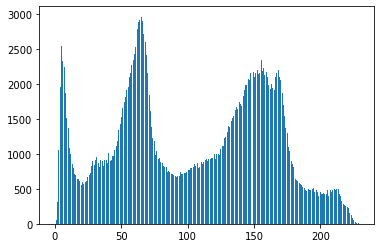

In [95]:
# Recorremos la imagen calculando el histograma
filename = 'imagen_3.tiff'
pixels = cv2.imread(filename)
pixels = cv2.cvtColor(pixels, cv2.COLOR_RGB2GRAY)
height, width = pixels.shape

histogram = [0]*255
for y in range(height):
  for x in range(width):
    cur_pixel = pixels[x, y]
    histogram[cur_pixel]+=1

# Restamos las parejas de barras
total=0
for y in range(1, len(histogram), 2):
  dif=abs(histogram[y-1]-histogram[y])
  total+=dif
plt.plot(histogram)
plt.show()
print(total)
print(histogram,)


histogram = []
for y in range(height):
  for x in range(width):
    cur_pixel = pixels[x, y]
    histogram.append(cur_pixel)
plt.hist(histogram, 300)
plt.show()





(array([30.,  0.,  2.,  1.,  1.,  1.,  0.,  2.,  2.,  0.,  2.,  0.,  2.,
         0.,  5., 10., 10.,  3.,  3.,  3.,  5.,  4.,  6.,  5.,  7.,  6.,
         2.,  7.,  9.,  9.,  8., 10.,  1.,  5.,  1.,  4.,  3.,  1.,  2.,
         0.,  3.,  1.,  1.,  0.,  1.,  1.,  4.,  3.,  1.,  2.,  1.,  0.,
         0.,  3.,  0.,  4.,  2.,  2.,  1.,  0.,  0.,  2.,  1.,  2.,  4.,
         4.,  2.,  0.,  2.,  5.,  4.,  4.,  2.,  2.,  2.,  2.,  2.,  1.,
         1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,
         0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.]),
 array([   0.  ,   29.94,   59.88,   89.82,  119.76,  149.7 ,  179.64,
         209.58,  239.52,  269.46,  299.4 ,  329.34,  359.28,  389.22,
         419.16,  449.1 ,  479.04,  508.98,  538.92,  568.86,  598.8 ,
         628.74,  658.68,  688.62,  718.56,  748.5 ,  778.44,  808.38,
         838.32,  868.26,  898.2 ,  928.14,  958.08,  988.02, 1017.96,
        1047.9 , 1077.84, 1107.78, 1137.72, 1167.66, 1197.6 , 1227.54,
        

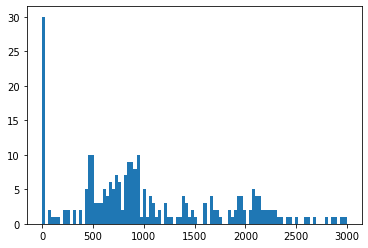

In [70]:
# importing required libraries of opencv 
import cv2 
  
# importing library for plotting 
from matplotlib import pyplot as plt 
  
# reads an input image 
img = cv2.imread('imagen_2.tiff',0) 
  
# find frequency of pixels in range 0-255 
histr = cv2.calcHist([img],[0],None,[255],[0,255]) 
  
# show the plotting graph of an image 
plt.hist(histr,100) 


Shape(512, 512, 3)
Message:
En un lugar de la Mancha, de cuyo nombre no quiero acordarme, no ha mucho tiempo que vivia un hidalgo de los de lanza en astillero, adarga antigua, rocin flaco y galgo corredor. Una olla de algo mas vaca que carnero, salpicon las mas noches, duelos y quebrantos los sabados, lentejas los viernes, algun palomino de aÃ±adidura los domingos, consumian las tres partes de su hacienda. El resto della concluian sayo de velarte, calzas de velludo para las fiestas con sus pantuflos de lo mismo, los dias de entre semana se honraba con su vellori de lo mas fino. Tenia en su casa una ama que pasaba de los cuarenta, y una sobrina que no llegaba a los veinte, y un mozo de campo y plaza, que asi ensillaba el rocin como tomaba la podadera. Frisaba la edad de nuestro hidalgo con los cincuenta aÃ±os, era de complexion recia, seco de carnes, enjuto de rostro, gran madrugador y amigo de la caza. Quieren decir que tenia el sobrenombre de Quijada o Quesada (que en esto hay alguna 

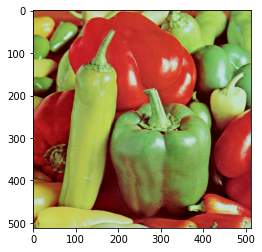

In [57]:
img = cv2.imread('imagen_3.tiff')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
print('Shape'+ str(img.shape))
rescued_msg = extract_message_from_columns(img)
plt.imshow(img)
print('Message:')
print(rescued_msg)

### **Escondiendo un mensaje**

In [ ]:
def hide_message(img, message):
  message += '@'
  bytes_msg = bytes(message, 'utf-8')


  b = bitstring.BitArray(bytes = bytes_msg)

  rows, columns, channels = img.shape
  img_copied = np.copy(img)

  msg_len = len(b)
  msg_indx = 0

  for i in range(rows):
    for j in range(columns):
      for k in range(channels):
        b_ch = bitstring.BitArray(uint = img_copied[i,j,k], length = 8)
        b_ch.set(b[msg_indx], -1)
        img_copied[i,j,k] = b_ch.uint
       
        if msg_indx == msg_len - 1:
          break

        msg_indx += 1

  return img_copied

### **Extrayendo el mensaje**

In [ ]:
def extract_message(img):
  bits = ''
  rows, columns, channels = img.shape

  for i in range(rows):
    for j in range(columns):
      for k in range(channels):
        b_ch = bitstring.BitArray(uint = img[i,j,k], length = 8)
        value = 1 if b_ch[-1] == True else 0
        bits += str(value)
  
  bits_msg = bitstring.BitArray(bin = bits)
  rescued_msg = ''
  for byte in bits_msg.bytes:
      if byte > 31 and byte < 126:
        rescued_msg += chr(byte)

  rescued_msg = rescued_msg[:rescued_msg.find('@')]

  return rescued_msg